In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 12

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('out_sts.csv', index_col=0, parse_dates=True)

In [8]:
df.head(1)

,ConstantLoad:LOAD-4000:Heat Rate [W],ConstantLoad:LOAD-4000:Inlet Temp. [C],ConstantLoad:LOAD-4000:Outlet Temp [C],Elapsed Time [s],GroundHeatExchangerSTS:GHE 1:Flow Rate [kg/s],GroundHeatExchangerSTS:GHE 1:Heat Rate [W],GroundHeatExchangerSTS:GHE 1:Inlet Temp. [C],GroundHeatExchangerSTS:GHE 1:Outlet Temp [C]
Date/Time,,,,,,,,
2019-01-01,4000.0,16.1,16.1,0,0.0,0,16.1,16.1


In [9]:
df.columns

Index(['ConstantLoad:LOAD-4000:Heat Rate [W]',
       'ConstantLoad:LOAD-4000:Inlet Temp. [C]',
       'ConstantLoad:LOAD-4000:Outlet Temp [C]', 'Elapsed Time [s]',
       'GroundHeatExchangerSTS:GHE 1:Flow Rate [kg/s]',
       'GroundHeatExchangerSTS:GHE 1:Heat Rate [W]',
       'GroundHeatExchangerSTS:GHE 1:Inlet Temp. [C]',
       'GroundHeatExchangerSTS:GHE 1:Outlet Temp [C]'],
      dtype='object')

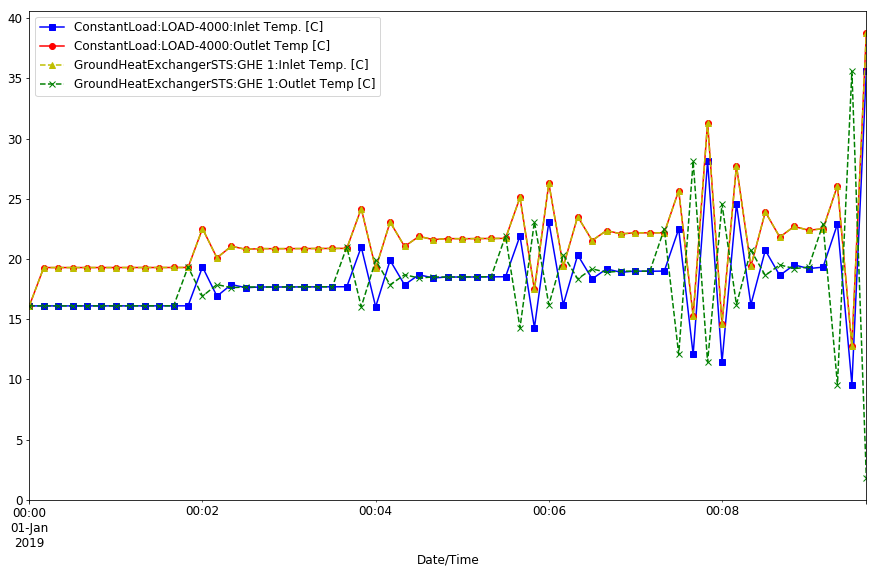

In [17]:
styles = ['bs-','ro-','y^--', 'gx--']

df[['ConstantLoad:LOAD-4000:Inlet Temp. [C]', 
    'ConstantLoad:LOAD-4000:Outlet Temp [C]',
    'GroundHeatExchangerSTS:GHE 1:Inlet Temp. [C]',
    'GroundHeatExchangerSTS:GHE 1:Outlet Temp [C]']].plot(style=styles)